This is all about the Diffusion Pattern.The more about diffusion is [here](https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/)

### To insert a weblink in Jupyter notebook:
Use the following:
write the name that appears inside[] and the whole weblink inside().

In [2]:
import numpy as np
import json
import random as random
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Consider a 2D lattice of Length L

In [3]:
L = 10 # Length of the lattice, we create 10 by 10 sqaure lattice later

We can use a vacant list to create the initial configuration where initially 
we assume the particle is at the middle of the lattice

In [7]:
def List(L):
    P = [[0 for i in range(L)]for j in range(L)] # This createsa vacant list
    P[int(L/2)][int(L/2)] = 1 # put paticle at the center
    return P

In [8]:
P=List(L)
P

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

### Make a plot of the lattice

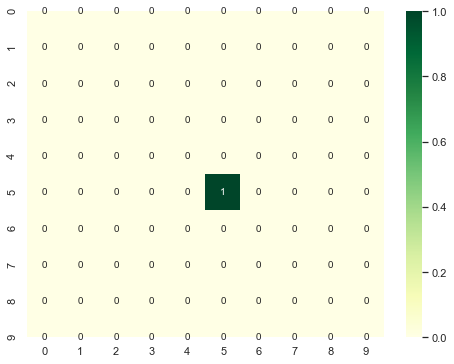

In [10]:
plt.figure(figsize = [8,6]) # you can change the figure size
sns.heatmap(P,annot=True,cmap='YlGn')# cmap function defining the color

### Create a function to diffuse a particle
Here we define in terms of i,j points and all nearest possible pair around (i,j)

P[i,j] = P[i+1,j]+P[i-1,j]+P[i,j+1]+P[i,j-1]

In [11]:
def diffuse_initial(P,L): # defines initial 
    PP = [[0 for i in range(L)]for j in range(L)]
    for i in range(L):
        for j in range(L):
            PP[i,j] = P[i+1][j]+ P[i-1][j] + P[i][j+1] + P[i][j-1]
    PP = PP/np.sum(PP)
    return PP

In [12]:
L =10
P = List(L)

### Set the boundary conditions

1. Lower limit
P[0-1,j] = P[L,j]
P[I,0-1] = P[i,L]
2.Upper limit
P[L+1,j] = P[0,j]
P[i,L+1] = P[i,0]

In [14]:
def diffuse(P,L):

    '''create vacant list of list'''
    PP =  [[0 for i in range(L)]for j in range(L)]

    '''diffuse 1-step over supplied configuration'''
    for i in range(L):
          for j in range(L):

            '''set boundary condition at bottom and left'''    
            ni =0; nj =0
            if i==0:ni = L
            if j==0:nj = L

            '''add modulo to control boundary at top and right'''
            PP[i][j] = P[(i+1)%L][j] + P[(i-1) + ni][j]\
            + P[i][(j+1)%L] + P[i][(j-1)+nj]

    '''normalize'''        
    PP = PP/np.sum(PP)

    return PP
    

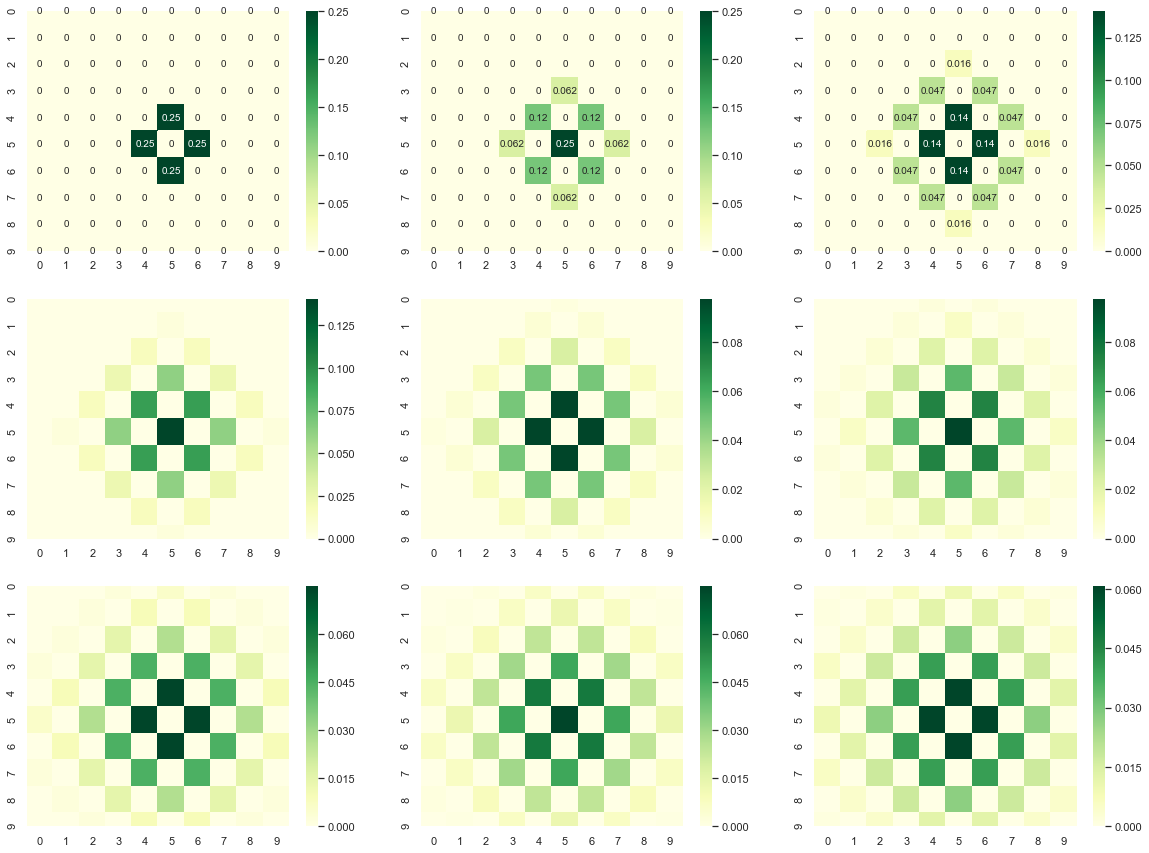

In [17]:
L =10
P =List(L)
plt.figure(figsize = [20,15])
plt.subplot(3,3,1)
P = diffuse(P,L)
sns.heatmap(P,annot=True,cmap='YlGn')
plt.subplot(3,3,2)
P = diffuse(P,L)
sns.heatmap(P,annot=True,cmap='YlGn')
plt.subplot(3,3,3)
P = diffuse(P,L)
sns.heatmap(P,annot=True,cmap='YlGn')
plt.subplot(3,3,4)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,5)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,6)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,7)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,8)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,9)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
  
plt.show()

### Run the diffusion step with desire number of running steps

In [18]:
def run_diffuse(P,nrun,L):

    run = 0

    '''diffuse N times'''
    while run < nrun:
        P = diffuse(P,L)
        run = run+1
    return P

We can make a plot of arbitrary diffusion step by selecting " irun " in function runner

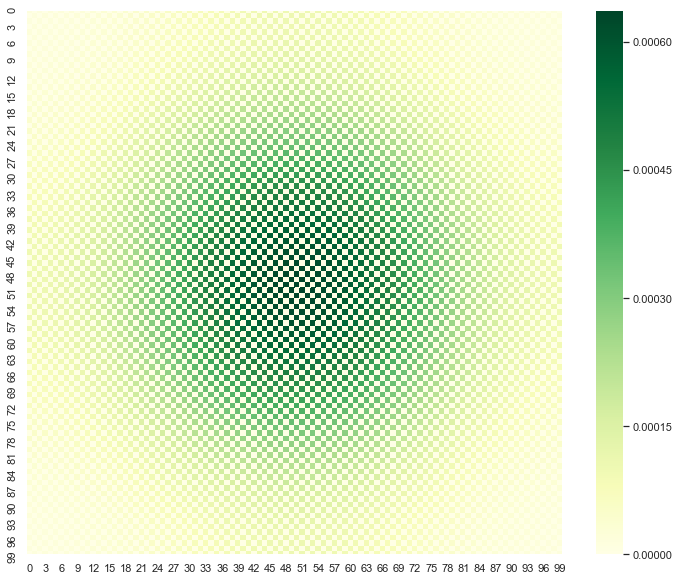

In [22]:
'''set parameters'''
L = 100 ; nrun = 1000 ; P = List(L)

'''run diffusion'''
P = run_diffuse(P,nrun,L)
plt.figure(figsize = [12,10])
sns.heatmap(P,annot=False,cmap='YlGn') 
plt.show()

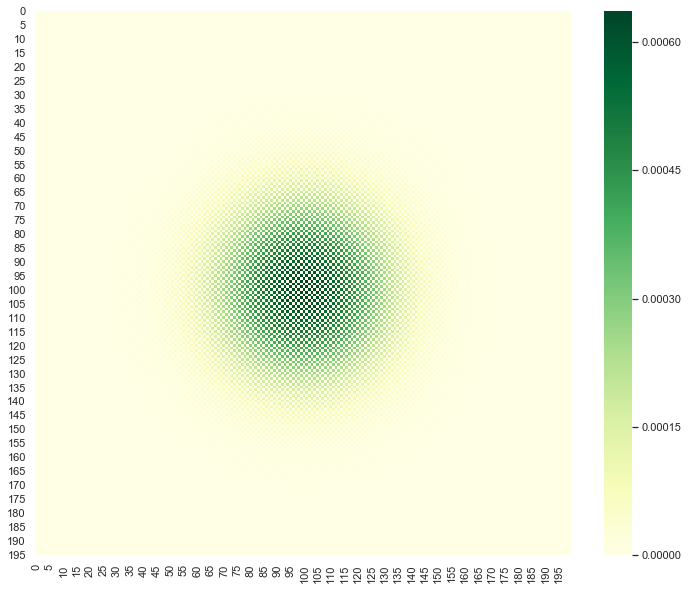

In [24]:
# To get the much finer figure
L = 200
nrun = 1000
P = List(L)

'''run diffusion'''
P = run_diffuse(P,nrun,L)
plt.figure(figsize = [12,10])
sns.heatmap(P,annot=False,cmap='YlGn')  
plt.show()